In [17]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]
            
            
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
 
te = TransactionEncoder()
oht_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print (frequent_itemsets)
 
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
print (rules)

    support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Kidney Beans, Eggs)
6       0.6                (Eggs, Onion)
7       0.6         (Kidney Beans, Milk)
8       0.6        (Kidney Beans, Onion)
9       0.6       (Kidney Beans, Yogurt)
10      0.6  (Kidney Beans, Eggs, Onion)
             antecedents            consequents  antecedent support  \
0                 (Eggs)                (Onion)                 0.8   
1                (Onion)                 (Eggs)                 0.6   
2   (Kidney Beans, Eggs)                (Onion)                 0.8   
3  (Kidney Beans, Onion)                 (Eggs)                 0.6   
4                 (Eggs)  (Kidney Beans, Onion)                 0.8   
5                (Onion)   (Kidney Beans, Eggs)                 0.6   

   consequ

In [18]:
support = rules['support'].values
confidence = rules['confidence'].values


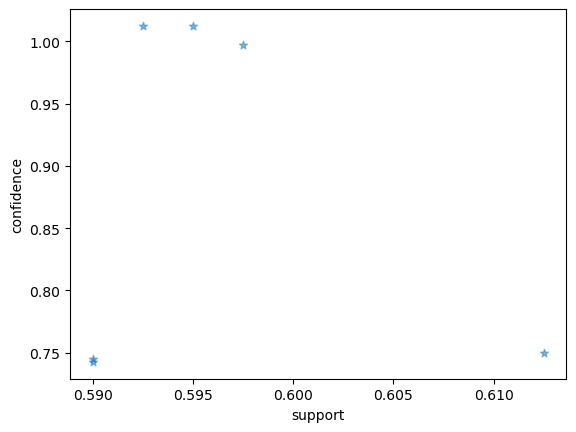

In [19]:
import random
import matplotlib.pyplot as plt
 
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [20]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
print("Association Rules:")
print(rules)


Frequent Itemsets:
    support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Kidney Beans, Eggs)
6       0.6                (Eggs, Onion)
7       0.6         (Kidney Beans, Milk)
8       0.6        (Kidney Beans, Onion)
9       0.6       (Kidney Beans, Yogurt)
10      0.6  (Kidney Beans, Eggs, Onion)
Association Rules:
             antecedents            consequents  antecedent support  \
0                 (Eggs)                (Onion)                 0.8   
1                (Onion)                 (Eggs)                 0.6   
2   (Kidney Beans, Eggs)                (Onion)                 0.8   
3  (Kidney Beans, Onion)                 (Eggs)                 0.6   
4                 (Eggs)  (Kidney Beans, Onion)                 0.8   
5                (Onion)   (Kidney Beans, Eg

C:\Users\meuni\anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:304: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


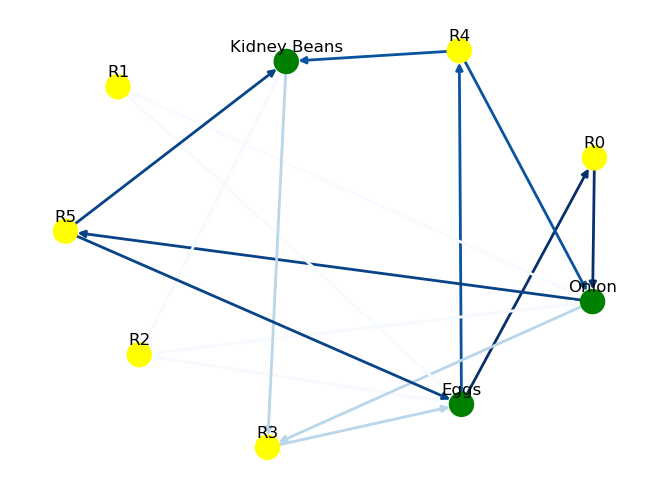

In [21]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns


def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    
    color_map = []
    N = 50
    colors = np.random.rand(N)
    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']
    
    for i in range(rules_to_show):
        G1.add_node("R"+str(i))
        
        for a in rules.iloc[i]['antecedents']:
            G1.add_node(a)
            G1.add_edge(a, "R"+str(i), color=colors[i], weight=2)
        
        for c in rules.iloc[i]['consequents']:
            G1.add_node(c)
            G1.add_edge("R"+str(i), c, color=colors[i], weight=2)
    
    for node in G1:
        found_a_string = False
        for item in strs:
            if node == item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')
    
    edges = G1.edges()
    edge_colors = [G1[u][v]['color'] for u, v in edges]
    edge_weights = [G1[u][v]['weight'] for u, v in edges]
    
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, with_labels=False, node_color=color_map, edge_color=edge_colors, width=edge_weights, font_size=16, edge_cmap=plt.cm.Blues)
    
    for p in pos:
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    
    plt.show()

# Appel de la fonction draw_graph avec les règles et le nombre souhaité
draw_graph(rules, 6)
